<h1> Part 1: Blob Detection with OpenCV </h1>
In this section we will use OpenCV's SimpleBlobDetector class to detect blobs in an image. Run the cell below to import libraries: 

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Some helper functions that will be useful later
def draw_keypoints_on_image(keypoints, image):
    for kp in keypoints:
        x, y = int(kp.pt[0]), int(kp.pt[1])  # center
        r = int(kp.size / 2)  # radius
        cv2.circle(image, (x, y), r, (0, 255, 0), thickness=3)
    return image

First, lets load the image and see what they look like:

SUCCESS


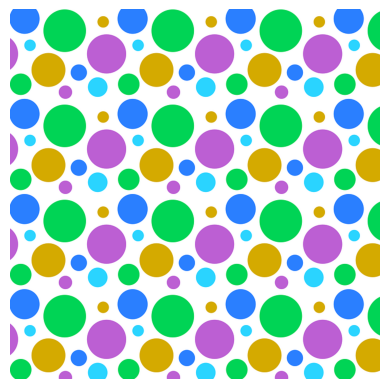

In [2]:
FILE_1 = "images/polka_dots_1.png"
original_image_1 = cv2.imread(FILE_1)

print("SUCCESS")

plt.imshow(original_image_1)
plt.axis("off")
plt.show()

Now, we can grayscale the image and simply call the SimpleBlobDetector constructor to detect blobs

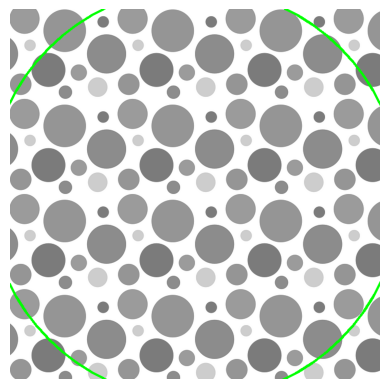

In [8]:
image = cv2.imread(FILE_1, cv2.IMREAD_GRAYSCALE)

params = cv2.SimpleBlobDetector_Params()

# Parameters
params.minThreshold = 1   
params.maxThreshold = 10   
params.filterByArea = False
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False
params.filterByColor = False
params.minRepeatability = 1

detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(image)

# Convert grayscale image to color for drawing
img = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

output = draw_keypoints_on_image(keypoints, img)
plt.imshow(output)
plt.axis("off")
plt.show()


Wait, what's going on here? Why are none of the polka dots circled? \
We need to set better parameters in order for OpenCV to detect the blobs! Check out the OpenCV reference to see what parameters you can change(https://docs.opencv.org/3.4/d8/da7/structcv_1_1SimpleBlobDetector_1_1Params.html)



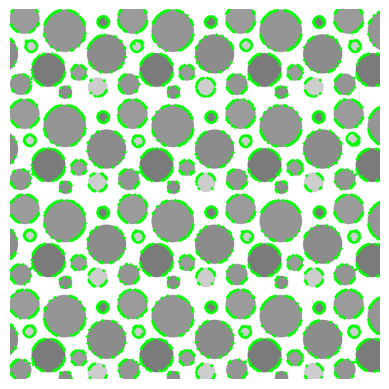

In [9]:
#TODO: edit/add parameters so blobs are circled
params.minThreshold = 1  
params.maxThreshold = 255
params.thresholdStep = 5

params.filterByArea = True
params.filterByCircularity = True
params.minCircularity = 0.7
params.filterByConvexity = True
params.minConvexity = 0.01
params.filterByInertia = True
params.filterByColor = True
params.minRepeatability = 1
params.minArea = 2
params.maxArea = 500
params.minDistBetweenBlobs = 10




detector = cv2.SimpleBlobDetector_create(params)
keypoints = detector.detect(image)

#Convert grayscale image to color for drawing
output = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

output = draw_keypoints_on_image(keypoints, output)
plt.imshow(output)
plt.axis("off")
plt.show()

Congrats! You now have a simple blob detector ready for use. Feel free to try this blob detector on other images to see what happens!

<h1> (Optional) Part 2: Create your own blob detection system! </h1>

Using LoG or your own method, design a system to detect objects on a uniform background


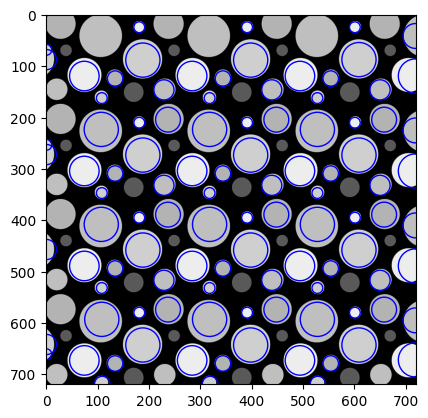

In [45]:
# using laplacian of gaussian 
from skimage import feature, color, io
import math
import matplotlib.pyplot as plt

def log_find_blobs(image):
    # invert so get light blobs on dark background, so can use LOG
    image = 255 - image
    # print(image)
    blob_log = feature.blob_log(image, max_sigma=30, num_sigma=10, threshold=0.2)
    # get radii
    blob_log[:, 2] = blob_log[:, 2] * math.sqrt(2)

    # display
    fig, ax = plt.subplots()
    ax.imshow(image, cmap='gray')
    for y, x, r in blob_log:
        c = plt.Circle((x,y), r, color='blue', linewidth=1, fill=False)
        ax.add_patch(c)
    plt.show()
    return

log_find_blobs(image)


# keypoints = get_keypoints(image)
# output = draw_keypoints_on_image(keypoints, output)
# plt.imshow(output)
# plt.axis("off")
# plt.show()